# **Проект e-commerce: вариант 1** 
___

### Продакт-менеджер Василий попросил проанализировать совершенные покупки и ответить на следующие вопросы:
___

###
##### [**1. Сколько пользователей, которые совершили покупку только один раз?**](#1-сколько-пользователей-которые-совершили-покупку-только-один-раз) (<span style="color:red">7 баллов</span>) 

##### [**2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?**](#2-сколько-заказов-в-месяц-в-среднем-не-доставляется-по-разным-причинам-вывести-детализацию-по-причинам) (<span style="color:red">5 баллов</span>)

##### [**3. По каждому товару определить, в какой день недели товар чаще всего покупается.**](#3-по-каждому-товару-определить-в-какой-день-недели-товар-чаще-всего-покупается) (<span style="color:red">5 баллов</span>)

##### [**4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?**](#4-сколько-у-каждого-из-пользователей-в-среднем-покупок-в-неделю-по-месяцам)  **Внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.** (<span style="color:red">8 баллов</span>) 

##### [**5. Используя pandas, провести когортный анализ пользователей. В период с января по декабрь выявить когорту с самым высоким retention на 3й месяц.**](#5-используя-pandas-провести-когортный-анализ-пользователей-в-период-с-января-по-декабрь-выявить-когорту-с-самым-высоким-retention-на-3й-месяц) (<span style="color:red">10 баллов</span>)

##### [**6. Часто для качественного анализа аудитории используют подходы, основанные на сегментации. Используя python, построить RFM-сегментацию пользователей, чтобы качественно оценить аудиторию.**](#6-часто-для-качественного-анализа-аудитории-используют-подходы-основанные-на-сегментации-используя-python-построить-rfm-сегментацию-пользователей-чтобы-качественно-оценить-аудиторию)  **В кластеризации можно выбрать следующие метрики:**
   * R - время от последней покупки пользователя до текущей даты,
   * F - суммарное количество покупок у пользователя за всё время,
   * M - сумма покупок за всё время.  

##### **Подробно описать, как создавались кластеры.   Для каждого RFM-сегмента построить границы метрик recency, frequency и monetary для интерпретации этих кластеров.   Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик:**
   * recency от 130 до 500 дней,
   * frequency от 2 до 5 заказов в неделю,
   * monetary от 1780 до 3560 рублей в неделю. (<span style="color:red">35 баллов</span>)
___
Для решения задачи провести предварительное исследование данных и сформулировать, что должно считаться покупкой. Обосновать свой выбор можно с помощью фактов оплат, статусов заказов и других имеющихся данных.
###

## **Файлы:**

###
> [<span style="color:violet">**olist_customers_datase.csv**</span>](https://disk.yandex.ru/d/FUi5uSd6BfG_ig "https://disk.yandex.ru/d/FUi5uSd6BfG_ig") — таблица с уникальными идентификаторами пользователей:  
>  * <span style="color:orange">customer_id</span> — позаказный идентификатор пользователя (аналог номера паспорта)
>  * <span style="color:orange">customer_unique_id</span> —  уникальный идентификатор пользователя
>  * <span style="color:orange">customer_zip_code_prefix</span> —  почтовый индекс пользователя
>  * <span style="color:orange">customer_city</span> —  город доставки пользователя
>  * <span style="color:orange">customer_state</span> —  штат доставки пользователя

>[<span style="color:violet">**olist_orders_dataset.csv**</span>](https://disk.yandex.ru/d/t9Li4JOfgxuUrg "https://disk.yandex.ru/d/t9Li4JOfgxuUrg") —  таблица заказов:  
>  * <span style="color:orange">order_id</span> —  уникальный идентификатор заказа (номер чека)
>  * <span style="color:orange">customer_id</span> —  позаказный идентификатор пользователя (аналог номера паспорта)
>  * <span style="color:orange">order_status</span> —  статус заказа
>  * <span style="color:orange">order_purchase_timestamp</span> —  время создания заказа
>  * <span style="color:orange">order_approved_at</span> —  время подтверждения оплаты заказа
>  * <span style="color:orange">order_delivered_carrier_date</span> —  время передачи заказа в логистическую службу
>  * <span style="color:orange">order_delivered_customer_date</span> —  время доставки заказа
>  * <span style="color:orange">order_estimated_delivery_date</span> —  обещанная дата доставки

>[<span style="color:violet">**olist_order_items_dataset.csv**</span>](https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw "https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw") —  товарные позиции, входящие в заказы:  
>  * <span style="color:orange">order_id</span> —  уникальный идентификатор заказа (номер чека)
>  * <span style="color:orange">order_item_id</span> —  идентификатор товара внутри одного заказа
>  * <span style="color:orange">product_id</span> —  ид товара (аналог штрихкода)
>  * <span style="color:orange">seller_id</span> — ид производителя товара
>  * <span style="color:orange">shipping_limit_date</span> —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
>  * <span style="color:orange">price</span> —  цена за единицу товара
>  * <span style="color:orange">freight_value</span> —  вес товара
###

###
 Пример структуры данных можно визуализировать по <span style="color:orange">order_id</span> == 00143d0f86d6fbd9f9b38ab440ac16f5
___
> Уникальные статусы заказов в таблице <span style="color:orange">olist_orders_dataset</span>:  
>  * **created** —  создан
>  * **approved** —  подтверждён
>  * **invoiced** —  выставлен счёт
>  * **processing** —  в процессе сборки заказа
>  * **shipped** —  отгружен со склада
>  * **delivered** —  доставлен пользователю
>  * **unavailable** —  недоступен
>  * **canceled** —  отменён
###

### Используемые библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

%matplotlib inline

### Установка дефолтных настроек графиков

In [2]:
sns.set_theme(
    font_scale=2,
    style='whitegrid',
    rc={'figure.figsize': (20, 7)}
)

### Запись путей до используемых таблиц

In [131]:
path_to_customers = r'olist_customers_dataset.zip'
path_to_order_items = r'olist_order_items_dataset.zip'
path_to_orders= r'olist_orders_dataset.zip'

### Загрузка таблиц с предпросмотром и со сводной информацией по столбцам

---

### <span style="color:violet">**customers**</span>

In [132]:
customers = pd.read_csv(path_to_customers)
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


---

### <span style="color:violet">**order_items**</span>

In [133]:
order_items = pd.read_csv(path_to_order_items)
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [7]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


##### В данных есть переменная времени, имеющая строчный тип. Следует перевести ее во временной тип. #####

In [8]:
order_items.shipping_limit_date = pd.to_datetime(order_items.shipping_limit_date)
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


---

### <span style="color:violet">**orders**</span>

In [134]:
orders = pd.read_csv(path_to_orders)
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


##### С помощью данной таблицы нужно определить, что именно будет считаться покупкой. Важной переменной в этом вопросе будет <span style="color:orange"> order_status </span>. В первую очередь стоит обратить внимание на значения **created**, **canceled**, **unavailable**, **delivered**:
>* ##### **created** - заказ был создан, но оплата не подтверждена. Можно считать, что это первый статус заказа, с которого начинается его дальнейшее отслеживание по таблице. Логично считать, что заказы с таким статусом еще не будут являться покупкой.
>* ##### **canceled** - заказ отменен (покупателем). Определенно не является покупкой.
>* ##### **unavailable** - заказ недоступен (по различным причинам). Точно не покупка.  
>* ##### **delivered** - заказ доставлен. Будет являться покупкой, по причине непосредственного получения заказа покупателем.
##### Помимо всего прочего, здесь целых 5 временных переменных, имеющих в таблице строчный тип данных, из которых в 3 присутствуют нулевые значения. #####

  * ##### Стоит разобраться с нулевыми значениями: с чем связано их наличие, как они влияют на статус покупки заказа, а также как они связаны с переменной статуса заказа. #####

<span style="color:orange"> order_approved_at </span>

In [11]:
orders[orders.order_approved_at.isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 1130 to 99347
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       160 non-null    object
 1   customer_id                    160 non-null    object
 2   order_status                   160 non-null    object
 3   order_purchase_timestamp       160 non-null    object
 4   order_approved_at              0 non-null      object
 5   order_delivered_carrier_date   14 non-null     object
 6   order_delivered_customer_date  14 non-null     object
 7   order_estimated_delivery_date  160 non-null    object
dtypes: object(8)
memory usage: 11.2+ KB


##### Интересно, что присутствует по 14 значений, у которых нет <span style="color:orange"> order_approved_at </span>, и есть <span style="color:orange"> order_delivered_carrier_date </span> и <span style="color:orange"> order_delivered_customer_date </span>.

##### Так как величина <span style="color:orange"> order_approved_at </span> описана как "время подтверждения оплаты заказа", то, если этой даты нет, значит, можно считать, что такие случаи не будут покупкой. Стоит еще посмотреть на статусы этих заказов. #####

In [12]:
orders[orders.order_approved_at.isna()].order_status.unique()

array(['canceled', 'delivered', 'created'], dtype=object)

##### У заказов без подтверждения оплаты присутствуют такие, что имеют статус **delivered**. Нужно посмотреть на такие заказы отдельно.

In [13]:
orders[(orders.order_approved_at.isna()) & (orders.order_status == 'delivered')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00


##### Как видно, именно эти 14 значений имеют <span style="color:orange"> order_delivered_carrier_date </span> и <span style="color:orange"> order_delivered_customer_date </span>. Значит они имеют какую-то особенность, например это подарок от продавца, либо доставка в качестве извинения за некорректную работу, или какая-либо акция, приз с розыгрыша, в конечном счете это может быть просто ошибкой при заполнении таблицы. Также все даты у этих заказов - это февраль и март 2017 года. Такие заказы будет более уместно не учитывать в качестве покупки.

In [14]:
orders[-orders.order_approved_at.isna()].order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'approved'], dtype=object)

<span style="color:orange"> order_delivered_carrier_date </span>

In [15]:
orders[orders.order_delivered_carrier_date.isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1783 entries, 6 to 99415
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       1783 non-null   object
 1   customer_id                    1783 non-null   object
 2   order_status                   1783 non-null   object
 3   order_purchase_timestamp       1783 non-null   object
 4   order_approved_at              1637 non-null   object
 5   order_delivered_carrier_date   0 non-null      object
 6   order_delivered_customer_date  1 non-null      object
 7   order_estimated_delivery_date  1783 non-null   object
dtypes: object(8)
memory usage: 125.4+ KB


In [16]:
orders[orders.order_delivered_carrier_date.isna()].order_status.unique()

array(['invoiced', 'processing', 'unavailable', 'canceled', 'created',
       'approved', 'delivered'], dtype=object)

In [17]:
orders[-orders.order_delivered_carrier_date.isna()].order_status.unique()

array(['delivered', 'shipped', 'canceled'], dtype=object)

In [18]:
orders[(orders.order_delivered_carrier_date.isna()) & (orders.order_status == 'delivered')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaN,2017-11-20 19:44:47,2017-11-14 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00


##### Имеется два заказа со статусом **delivered**, с наличием времени оплаты, но без времени передачи в логистическую службу. Также у одного заказа еще отсутствет время доставки покупателю.

<span style="color:orange"> order_delivered_customer_date </span>

In [19]:
orders[orders.order_delivered_customer_date.isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2965 entries, 6 to 99415
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       2965 non-null   object
 1   customer_id                    2965 non-null   object
 2   order_status                   2965 non-null   object
 3   order_purchase_timestamp       2965 non-null   object
 4   order_approved_at              2819 non-null   object
 5   order_delivered_carrier_date   1183 non-null   object
 6   order_delivered_customer_date  0 non-null      object
 7   order_estimated_delivery_date  2965 non-null   object
dtypes: object(8)
memory usage: 208.5+ KB


In [20]:
orders[orders.order_delivered_customer_date.isna()].order_status.unique()

array(['invoiced', 'shipped', 'processing', 'unavailable', 'canceled',
       'delivered', 'created', 'approved'], dtype=object)

In [21]:
orders[-orders.order_delivered_customer_date.isna()].order_status.unique()

array(['delivered', 'canceled'], dtype=object)

In [22]:
orders[(orders.order_delivered_customer_date.isna()) & (orders.order_status == 'delivered')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaN,2018-07-24 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaN,2018-06-26 00:00:00
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaN,2018-07-19 00:00:00


##### Есть 8 доставленных заказов без времени доставки, но время оплаты присутствует.

##### Обобщая всю полученную информацию и учитывая все обговоренности, покупкой будет считаться заказ, имеющий время оплаты, но без статусов **canceled**, **unavailable**.

In [23]:
orders['is_purchase'] = orders.order_id.isin(orders[(-orders.order_approved_at.isna()) & (-orders.order_status.isin(['canceled', 'unavailable']))].order_id)
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_purchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,True
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,True
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,True
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,True
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,True
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,True
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,True
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,True
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,True


##### Осталось только перевести <span style="color:orange"> order_purchase_timestamp </span>, <span style="color:orange"> order_approved_at </span>, <span style="color:orange"> order_delivered_carrier_date </span>, <span style="color:orange"> order_delivered_customer_date </span> и <span style="color:orange"> order_estimated_delivery_date </span> к временному типу данных.

In [24]:
orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp)
orders.order_approved_at = pd.to_datetime(orders.order_approved_at)
orders.order_delivered_carrier_date = pd.to_datetime(orders.order_delivered_carrier_date)
orders.order_delivered_customer_date = pd.to_datetime(orders.order_delivered_customer_date)
orders.order_estimated_delivery_date = pd.to_datetime(orders.order_estimated_delivery_date)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   is_purchase                    99441 non-null  bool          
dtypes: bool(1), datetime64[ns](5), object(3)
memory usage: 6.2+ MB


---

## [**1. Сколько пользователей, которые совершили покупку только один раз?**](#продакт-менеджер-василий-попросил-проанализировать-совершенные-покупки-и-ответить-на-следующие-вопросы)

---

##### Для этого нужно выбрать те заказы, что являются покупками, соединить с таблицей покупаетелей, сгруппировать таблицу по уникальным идентификаторам пользователей с подсчетом заказов для каждого, после чего выбрать только тех, у которых всего одна покупка.

In [25]:
customer_number_of_purchases = customers[['customer_id', 'customer_unique_id']] \
                                        .merge(orders[['customer_id', 'order_id', 'is_purchase']], on='customer_id') \
                                        .groupby('customer_unique_id', as_index=0).agg({'is_purchase': 'sum'})
customer_number_of_purchases

,customer_unique_id,is_purchase
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,1
96092,fffea47cd6d3cc0a88bd621562a9d061,1
96093,ffff371b4d645b6ecea244b27531430a,1
96094,ffff5962728ec6157033ef9805bacc48,1


In [26]:
customer_number_of_purchases[customer_number_of_purchases.is_purchase == 1].is_purchase.count()

92087

##### Итого <span style="color:red"> ***92087*** </span> пользователей совершили покупку всего один раз

---

## [**2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?**](#продакт-менеджер-василий-попросил-проанализировать-совершенные-покупки-и-ответить-на-следующие-вопросы)

---

##### Для решения задачи будет использована только таблица <span style="color:violet"> **orders** </span>

##### Для начала стоит разобраться, какие именно заказы подходят для ответа на вопрос. Сначала нужно выбрать заказы, не имеющие времени доставки (так как это прямой факт наличия доставки), а также заказы без статуса **delivered**. Из оставшихся значений можно выделить три причины, по которым заказы не доставляются:
>  * **canceled** - заказ отменен;
>  * **unavailable** - недоступен для доставки;
>  * **not_ready** - заказ просто не на стадии, готовой для доставки (не готов для доставки).

##### Для определения месяца будет использоваться колонка <span style="color:orange"> order_estimated_delivery_date </span>

In [27]:
not_delivered_orders = orders[(orders.order_delivered_customer_date.isna()) & -(orders.order_status == 'delivered')]
not_delivered_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_purchase
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,True
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,True
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,True
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,True
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,True
...,...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,False
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06,True
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27,False
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,False


In [28]:
def reason(df):
    if df == 'canceled':
        return 'canceled'
    elif df == 'unavailable':
        return 'unavailable'
    else:
        return 'not_ready'

In [29]:
not_delivered_orders['reason'] = not_delivered_orders.order_status.apply(reason)

not_delivered_orders

C:\Users\User\AppData\Local\Temp\ipykernel_11424\821947000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_delivered_orders['reason'] = not_delivered_orders.order_status.apply(reason)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_purchase,reason
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,True,not_ready
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,True,not_ready
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,True,not_ready
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,True,not_ready
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,True,not_ready
...,...,...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,False,canceled
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06,True,not_ready
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27,False,canceled
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,False,unavailable


In [30]:
not_delivered_orders['month'] = not_delivered_orders.order_estimated_delivery_date.dt.to_period('M')
not_delivered_orders

C:\Users\User\AppData\Local\Temp\ipykernel_11424\2280928785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_delivered_orders['month'] = not_delivered_orders.order_estimated_delivery_date.dt.to_period('M')


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_purchase,reason,month
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,True,not_ready,2017-05
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,True,not_ready,2018-06
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,True,not_ready,2018-08
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,True,not_ready,2017-10
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,True,not_ready,2018-02
...,...,...,...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,False,canceled,2018-10
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06,True,not_ready,2018-02
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27,False,canceled,2018-09
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,False,unavailable,2017-09


In [31]:
observed_months = not_delivered_orders.month.nunique()

In [32]:
not_delivered_per_reason = not_delivered_orders.groupby('reason', as_index=0).agg({'order_id': 'count'}).rename(columns={'order_id': 'not_delivered'})
not_delivered_per_reason.not_delivered = not_delivered_per_reason.not_delivered / observed_months
not_delivered_per_reason

,reason,not_delivered
0,canceled,23.807692
1,not_ready,66.500000
2,unavailable,23.423077


##### В результате получились следующие данные:
| Причина                     | количество заказов, не доставленное в месяц      |
|-----------------------------|--------------------------------------------------|
|**canceled** (отмена)        | <span style='color:red'> ***23.807692*** </span> |
|**unavailable** (недоступно) | <span style='color:red'> ***23.423077*** </span> |
|**not_ready** (неготово)     | <span style='color:red'> ***66.500000*** </span> |

---

## [**3. По каждому товару определить, в какой день недели товар чаще всего покупается.**](#продакт-менеджер-василий-попросил-проанализировать-совершенные-покупки-и-ответить-на-следующие-вопросы)

---

##### Для решения задания понадобятся таблицы <span style="color:violet"> **order_items** </span> и <span style="color:violet"> **orders** </span>

##### Нужно использовать заказы, являющиеся покупками, по колонке <span style="color:orange"> order_approved_at </span> определить день недели покупки, после объединить данные по товарам и дням недели покупки.

In [33]:
orders_purchases = orders[orders.is_purchase]
orders_purchases['weekday'] = orders_purchases.order_approved_at.dt.day_of_week
orders_purchases

C:\Users\User\AppData\Local\Temp\ipykernel_11424\156082234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_purchases['weekday'] = orders_purchases.order_approved_at.dt.day_of_week


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_purchase,weekday
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True,3
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,True,2
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,True,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,True,1
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,True,3
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,True,1
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,True,6
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,True,0


In [34]:
item_week_purchase = order_items[['order_id', 'product_id']].merge(orders_purchases[['order_id', 'weekday']], on='order_id') \
                                .groupby(['product_id', 'weekday'], as_index=0) \
                                .agg({'order_id': 'count'}) \
                                .sort_values(['product_id', 'weekday']) \
                                .rename(columns={'order_id': 'number_of_purchases'})
item_week_purchase

,product_id,weekday,number_of_purchases
0,00066f42aeeb9f3007548bb9d3f33c38,6,1
1,00088930e925c41fd95ebfe695fd2655,1,1
2,0009406fd7479715e4bef61dd91f2462,4,1
3,000b8f95fcb9e0096488278317764d19,2,1
4,000b8f95fcb9e0096488278317764d19,4,1
...,...,...,...
60788,fff9553ac224cec9d15d49f5a263411f,5,1
60789,fffdb2d0ec8d6a61f0a0a0db3f25b441,1,3
60790,fffdb2d0ec8d6a61f0a0a0db3f25b441,3,1
60791,fffdb2d0ec8d6a61f0a0a0db3f25b441,4,1


In [35]:
px.histogram(item_week_purchase, x='number_of_purchases')

##### По графику видно огромное наличие товаров, которые покупают в небольшом количестве. Очень много случаев, когда товар покупают всего огдин-два раза. 

##### Для каждого товара нужно найти максимальное значение, затем эти данные объединить с основной таблицей и оставить те значения, у которых количество покупок совпадает с максимальным.

In [36]:
max_purchase_amount = item_week_purchase.groupby(['product_id'], as_index=0).agg({'number_of_purchases': 'max'}).rename(columns={'number_of_purchases': 'max_amount'})
max_purchase_amount

,product_id,max_amount
0,00066f42aeeb9f3007548bb9d3f33c38,1
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,1
3,000b8f95fcb9e0096488278317764d19,1
4,000d9be29b5207b54e86aa1b1ac54872,1
...,...,...
32721,fff6177642830a9a94a0f2cba5e476d1,1
32722,fff81cc3158d2725c0655ab9ba0f712c,1
32723,fff9553ac224cec9d15d49f5a263411f,1
32724,fffdb2d0ec8d6a61f0a0a0db3f25b441,3


In [37]:
item_week_purchase = item_week_purchase.merge(max_purchase_amount, on='product_id')
item_week_purchase

,product_id,weekday,number_of_purchases,max_amount
0,00066f42aeeb9f3007548bb9d3f33c38,6,1,1
1,00088930e925c41fd95ebfe695fd2655,1,1,1
2,0009406fd7479715e4bef61dd91f2462,4,1,1
3,000b8f95fcb9e0096488278317764d19,2,1,1
4,000b8f95fcb9e0096488278317764d19,4,1,1
...,...,...,...,...
60788,fff9553ac224cec9d15d49f5a263411f,5,1,1
60789,fffdb2d0ec8d6a61f0a0a0db3f25b441,1,3,3
60790,fffdb2d0ec8d6a61f0a0a0db3f25b441,3,1,3
60791,fffdb2d0ec8d6a61f0a0a0db3f25b441,4,1,3


In [38]:
max_week_purchase =  item_week_purchase[item_week_purchase.number_of_purchases == item_week_purchase.max_amount][['product_id', 'weekday', 'number_of_purchases']]
week_int_to_str = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6:'Sunday'}
max_week_purchase['weekday_name'] = max_week_purchase.weekday.map(week_int_to_str)
max_week_purchase

,product_id,weekday,number_of_purchases,weekday_name
0,00066f42aeeb9f3007548bb9d3f33c38,6,1,Sunday
1,00088930e925c41fd95ebfe695fd2655,1,1,Tuesday
2,0009406fd7479715e4bef61dd91f2462,4,1,Friday
3,000b8f95fcb9e0096488278317764d19,2,1,Wednesday
4,000b8f95fcb9e0096488278317764d19,4,1,Friday
...,...,...,...,...
60786,fff6177642830a9a94a0f2cba5e476d1,5,1,Saturday
60787,fff81cc3158d2725c0655ab9ba0f712c,0,1,Monday
60788,fff9553ac224cec9d15d49f5a263411f,5,1,Saturday
60789,fffdb2d0ec8d6a61f0a0a0db3f25b441,1,3,Tuesday


##### На данном этапе для каждого товара уже выявлены дни недели с максимальным колическтвом покупок. Но стоит посмотреть на эти данные побольше. Некоторые товары имеют несколько дней недели, а также большое количество единичных покупок товаров в качестве максимального.

In [39]:
# Создание таблицы с количеством повторений каждого товара c несколькими максимальными значениями, а также с одним значанием
not_one_max_amount = max_week_purchase.groupby('product_id', as_index=0).agg({'weekday': 'count'}).rename(columns={'weekday': 'weekday_amount'}).query('weekday_amount != 1')
not_one_max_amount

,product_id,weekday_amount
3,000b8f95fcb9e0096488278317764d19,2
11,00210e41887c2a8ef9f791ebc780cc36,3
22,0030e635639c898b323826589761cf23,2
23,003128f981470c3e5a2e7445e4a771cd,2
29,003dbcabcf8e3231de657c7d9f9a5eba,2
...,...,...
32709,ffe013e1b4603e3b0b02fbb159d5b400,2
32710,ffe0fc4e02c3559643ac063fa5cf9d07,2
32711,ffe75578163d45caa52bca3529cb511e,2
32712,ffe8083298f95571b4a66bfbc1c05524,2


In [40]:
items_with_couple_days = max_week_purchase[max_week_purchase.product_id.isin(not_one_max_amount.product_id)]
items_with_couple_days

,product_id,weekday,number_of_purchases,weekday_name
3,000b8f95fcb9e0096488278317764d19,2,1,Wednesday
4,000b8f95fcb9e0096488278317764d19,4,1,Friday
21,00210e41887c2a8ef9f791ebc780cc36,0,2,Monday
23,00210e41887c2a8ef9f791ebc780cc36,5,2,Saturday
24,00210e41887c2a8ef9f791ebc780cc36,6,2,Sunday
...,...,...,...,...
60768,ffe75578163d45caa52bca3529cb511e,5,1,Saturday
60769,ffe8083298f95571b4a66bfbc1c05524,1,1,Tuesday
60770,ffe8083298f95571b4a66bfbc1c05524,5,1,Saturday
60785,fff6177642830a9a94a0f2cba5e476d1,0,1,Monday


##### Получилась таблица товаров с несколькими значениями. Можнно посмотреть на ее гистограмму.

In [41]:
px.histogram(items_with_couple_days.number_of_purchases)

##### Среди данных около 80% имеют единичные значения, еще 12% - две покупки, остальные восемь повторяющихся значений имеют от 3 до 30 покупок.

In [42]:
px.histogram(items_with_couple_days[items_with_couple_days.number_of_purchases > 2].number_of_purchases)

##### Итого, начиная с товаров с максимальным количеством покупок больше 30, все они имеют один день недели этого события. Остаетсятолько посмотреть на таблицу товаров, имеющих по одному дню недели.

In [43]:
items_with_one_day = max_week_purchase[-max_week_purchase.product_id.isin(not_one_max_amount.product_id)].sort_values('number_of_purchases', ascending=0)
items_with_one_day

,product_id,weekday,number_of_purchases,weekday_name
40846,aca2eb7d00ea1a7b8ebd4e68314663af,1,119,Tuesday
20032,53b36df67ebb7c41585e8d54d6772e08,1,105,Tuesday
15840,422879e10f46682990de24d770e7f83d,1,89,Tuesday
36359,99a4788cb24856965c36a24e339b6058,1,82,Tuesday
12995,368c6c730842d78016ad823897a372db,3,80,Thursday
...,...,...,...,...
23711,63444bbabe7f7185d14af28fa281f516,1,1,Tuesday
23703,6341b846e5224c87c04ec867c16e96af,0,1,Monday
23702,6341aca5b02d00d80b6f4dead6816435,4,1,Friday
23700,633ab0ec23c18ed1b64356a25ea7b5bd,1,1,Tuesday


In [44]:
px.histogram(items_with_one_day.number_of_purchases)

##### В этой таблице тоже много небольшого количества покупок. Используя предыдущую таблицу, пусть границей нижней границей количества покупок будет 30.

In [45]:
items_with_enough_purchases = items_with_one_day[items_with_one_day.number_of_purchases > 30]
items_with_enough_purchases

,product_id,weekday,number_of_purchases,weekday_name
40846,aca2eb7d00ea1a7b8ebd4e68314663af,1,119,Tuesday
20032,53b36df67ebb7c41585e8d54d6772e08,1,105,Tuesday
15840,422879e10f46682990de24d770e7f83d,1,89,Tuesday
36359,99a4788cb24856965c36a24e339b6058,1,82,Tuesday
12995,368c6c730842d78016ad823897a372db,3,80,Thursday
13504,389d119b48cf3043d311335e499d9c6b,1,75,Tuesday
19982,53759a2ecddad2bb87a079a1f1519f73,1,73,Tuesday
49899,d1c427060a0f73f6b889a5c7c61f2ac4,1,63,Tuesday
14790,3dd2a17168ec895c781a9191c1e95ad7,2,58,Wednesday
5137,154e7e31ebfa092203795c972e5804a6,1,56,Tuesday


##### Итого в конечном итоге получилось две таблицы: полная таблица товаров <span style="color:red"> ***max_week_purchase*** </span> и таблица товаров с достаточным количеством покупок <span style="color:red"> ***items_with_enough_purchases*** </span>.

---

## [**4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?**](#продакт-менеджер-василий-попросил-проанализировать-совершенные-покупки-и-ответить-на-следующие-вопросы)

---

##### В данном задании понадобится две таблицы: <span style="color:violet"> **customers** </span> и <span style="color:violet"> **orders** </span>.

##### Задание можно рассматривать как вывести для каждого пользователя по месяцам среднее количество покупок в неделю, либо как вывести для каждого пользователя среднее по месяцам от среднего по месяцам покупок в неделю. В любом случае две эти формулировки решения отделяет от друг-друга один шаг, так что здесь будут рассмотрены оба.

##### Для начала нужно сделать таблицу пользоваетелей с их покупками и датами этих покупок, после сгруппировать эту таблицу по пользователям и месяцам с количеством покупок в качестве аргумента.

In [46]:
customers_purchases = customers[['customer_unique_id', 'customer_id']].merge(orders[orders.is_purchase][['order_id', 'customer_id', 'order_approved_at']], on='customer_id')
customers_purchases

,customer_unique_id,customer_id,order_id,order_approved_at
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09
...,...,...,...,...
98183,1a29b476fee25c95fbafc67c5ac95cf8,17ddf5dd5d51696bb3d7c6291687be6f,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 16:08:45
98184,d52a67c98be1cf6a5c84435bd38d095d,e7b71a9017aa05c9a7fd292d714858e8,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:35:12
98185,e9f50caf99f032f0bf3c55141f019d99,5e28dfe12db7fb50a4b2f691faecea5e,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:30:03
98186,73c2643a0a458b49f58cea58833b192e,56b18e2166679b8a959d72dd06da27f9,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:31:20


##### Получилась таблица пользователей и их покупок, но в ней не учитываются пользователи без покупок, а также наличие покупок на каждый учитываемый месяц. Чтобы все это учесть, нужно взять всех уникальных пользователей, все учитываемые месяца и сделать таблицу из Декартового произведения этих переменных. Все учитываемые месяца можно получить из таблицы выше.

In [47]:
customers_purchases['month'] = customers_purchases.order_approved_at.dt.to_period('M')
customers_purchases = customers_purchases.sort_values('month')  # Сортировка по месяцам
customers_purchases

,customer_unique_id,customer_id,order_id,order_approved_at,month
20895,830d5b7aaa3b6f1e9ad63703bec97d23,86dc2ffce2dfff336de2f386a786e574,bfbd0f9bdef84302105ad712db648a6c,2016-09-15 12:16:38,2016-09
47516,4a6959f9a4aca95bb3733032d0a50c9e,fd997caf29864e0b5e0d328a2d163e3f,25f680bf746bec3df11d48318ff015de,2016-10-10 11:02:43,2016-10
15426,b9c47942414b4b3f08a3ae85f5c7e4d7,e76d70baaf2e6bf919577966bdc5ce8f,1a2b0033f0b7a3116f00594ec5524344,2016-10-06 22:58:22,2016-10
37300,75b181fe0ef694c753c72540c0fdd389,bd6048a0960b15881f1ae5dca277fb52,4d66b3a9d12facad48a3b23cc9fe7898,2016-10-04 14:09:08,2016-10
87292,eeb1b66fee35b3f1e3dfc27ff80fc0a2,dc7cdb748679fb6f280f66d7582c5e59,98974b076b01553d49ee6467905675a7,2016-10-06 15:57:59,2016-10
...,...,...,...,...,...
2001,a409f20404ecee9e1103673eb9a6cc3f,7793ba04890e84aee53d94009056bfff,64108ebb55ecc7f1a9a4477c5b0624f4,2018-08-21 04:29:34,2018-08
37280,a9a01f767af5be3c3666cf307d5f790f,26b73fb8069041c193a5001e01fcccfd,f4a8925490afed995d0e987c48908d2c,2018-08-28 09:30:15,2018-08
37292,bf1026701127b0a37adaee9a23d36f4f,634df8e0e275262ab76a3d15a07ddbac,317e2a850e41487363a134bb3369262b,2018-08-14 06:45:10,2018-08
83918,91f75e89e981ef7304d0c1fb35e503b6,566725ddad946bd0c0934125dc3126bd,032b42b17fe9daa676ba9447f3dbbd0a,2018-08-06 22:44:39,2018-08


In [48]:
months = customers_purchases.month.unique()
len(months)

24

In [49]:
unique_customers = customers.customer_unique_id.unique()
len(unique_customers)

96096

In [50]:
months = pd.DataFrame(months, columns=['month'])
unique_customers = pd.DataFrame(unique_customers, columns=['customer_unique_id'])
customers_months = unique_customers.merge(months, how='cross')
customers_months

,customer_unique_id,month
0,861eff4711a542e4b93843c6dd7febb0,2016-09
1,861eff4711a542e4b93843c6dd7febb0,2016-10
2,861eff4711a542e4b93843c6dd7febb0,2016-12
3,861eff4711a542e4b93843c6dd7febb0,2017-01
4,861eff4711a542e4b93843c6dd7febb0,2017-02
...,...,...
2306299,84732c5050c01db9b23e19ba39899398,2018-05
2306300,84732c5050c01db9b23e19ba39899398,2018-06
2306301,84732c5050c01db9b23e19ba39899398,2018-07
2306302,84732c5050c01db9b23e19ba39899398,2018-08


##### В результате получилась таблица со всеми пользователями и месяцами. Нужно добавить количество дней в каждом месяце. а также количество недель.

In [51]:
customers_months['days_in_month'] = customers_months.month.dt.days_in_month
customers_months['weeks_in_month'] = customers_months.days_in_month / 7
customers_months

,customer_unique_id,month,days_in_month,weeks_in_month
0,861eff4711a542e4b93843c6dd7febb0,2016-09,30,4.285714
1,861eff4711a542e4b93843c6dd7febb0,2016-10,31,4.428571
2,861eff4711a542e4b93843c6dd7febb0,2016-12,31,4.428571
3,861eff4711a542e4b93843c6dd7febb0,2017-01,31,4.428571
4,861eff4711a542e4b93843c6dd7febb0,2017-02,28,4.000000
...,...,...,...,...
2306299,84732c5050c01db9b23e19ba39899398,2018-05,31,4.428571
2306300,84732c5050c01db9b23e19ba39899398,2018-06,30,4.285714
2306301,84732c5050c01db9b23e19ba39899398,2018-07,31,4.428571
2306302,84732c5050c01db9b23e19ba39899398,2018-08,31,4.428571


##### Теперь нужно сгруппировать таблицу <span style="color:violet"> **customer_purchases** </span> по пользователям и месяцам с аргументом в виде количества покупок.

In [52]:
customers_months_have_purchases = customers_purchases.groupby(['customer_unique_id', 'month'], as_index=0) \
                                                        .agg({'order_id': 'count'}) \
                                                        .rename(columns={'order_id': 'number_of_purchases'}) \
                                                        .sort_values(['month', 'customer_unique_id'])
customers_months_have_purchases

,customer_unique_id,month,number_of_purchases
49696,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,1
74,0032c76b20340da25249092a268ce66c,2016-10,1
743,01f156677184504063bd19739f924af1,2016-10,1
1171,0313291a6f4f16df04dcf819d88c38ef,2016-10,1
2345,0636d30c77f0f9cfad81f1c9b58c791f,2016-10,1
...,...,...,...
96768,ffc4e1cd8aa220763480d0a18157c45d,2018-08,1
96799,ffe204b1bb8026741b839085b2fd10f2,2018-08,1
96820,ffec490ab531184a483efe2eedd68908,2018-08,1
96836,fff96bc586f78b1f070da28c4977e810,2018-08,1


In [53]:
customers_months_have_purchases.groupby('number_of_purchases', as_index=0).agg({'customer_unique_id': 'count'})

,number_of_purchases,customer_unique_id
0,1,95566
1,2,1228
2,3,44
3,4,7
4,6,1


##### Как видно большинство пользователей делают по одной покупке либо в месяц, либо делают всего одну покупку.

##### Теперь нужно объединить две таблицы.

In [54]:
full_customers_months = customers_months.merge(customers_months_have_purchases, on=['customer_unique_id', 'month'], how='left')
full_customers_months

,customer_unique_id,month,days_in_month,weeks_in_month,number_of_purchases
0,861eff4711a542e4b93843c6dd7febb0,2016-09,30,4.285714,NaN
1,861eff4711a542e4b93843c6dd7febb0,2016-10,31,4.428571,NaN
2,861eff4711a542e4b93843c6dd7febb0,2016-12,31,4.428571,NaN
3,861eff4711a542e4b93843c6dd7febb0,2017-01,31,4.428571,NaN
4,861eff4711a542e4b93843c6dd7febb0,2017-02,28,4.000000,NaN
...,...,...,...,...,...
2306299,84732c5050c01db9b23e19ba39899398,2018-05,31,4.428571,NaN
2306300,84732c5050c01db9b23e19ba39899398,2018-06,30,4.285714,NaN
2306301,84732c5050c01db9b23e19ba39899398,2018-07,31,4.428571,NaN
2306302,84732c5050c01db9b23e19ba39899398,2018-08,31,4.428571,NaN


In [55]:
full_customers_months.shape[0] - full_customers_months.number_of_purchases.isna().sum()

96846

##### Таблицы объединились правильно, осталось только изменить значения **NaN** в колонке <span style="color:orange"> number_of_purchases </span> на **0**.

In [56]:
full_customers_months = full_customers_months.fillna(0)

##### В результате данные по количеству покупок в месяц распределены так:

In [57]:
full_customers_months.groupby('number_of_purchases', as_index=0).agg({'customer_unique_id': 'count'})

,number_of_purchases,customer_unique_id
0,0.0,2209458
1,1.0,95566
2,2.0,1228
3,3.0,44
4,4.0,7
5,6.0,1


##### Осталось только поделить количество покупок на количество недель в месяце, чтобы получить ответ на первый вариант задания.

In [58]:
full_customers_months['purchases_per_week_in_month'] = full_customers_months.number_of_purchases / full_customers_months.weeks_in_month
full_customers_months

,customer_unique_id,month,days_in_month,weeks_in_month,number_of_purchases,purchases_per_week_in_month
0,861eff4711a542e4b93843c6dd7febb0,2016-09,30,4.285714,0.0,0.0
1,861eff4711a542e4b93843c6dd7febb0,2016-10,31,4.428571,0.0,0.0
2,861eff4711a542e4b93843c6dd7febb0,2016-12,31,4.428571,0.0,0.0
3,861eff4711a542e4b93843c6dd7febb0,2017-01,31,4.428571,0.0,0.0
4,861eff4711a542e4b93843c6dd7febb0,2017-02,28,4.000000,0.0,0.0
...,...,...,...,...,...,...
2306299,84732c5050c01db9b23e19ba39899398,2018-05,31,4.428571,0.0,0.0
2306300,84732c5050c01db9b23e19ba39899398,2018-06,30,4.285714,0.0,0.0
2306301,84732c5050c01db9b23e19ba39899398,2018-07,31,4.428571,0.0,0.0
2306302,84732c5050c01db9b23e19ba39899398,2018-08,31,4.428571,0.0,0.0


In [59]:
task_4_var_1 = full_customers_months[['customer_unique_id', 'month', 'purchases_per_week_in_month']]
task_4_var_1

,customer_unique_id,month,purchases_per_week_in_month
0,861eff4711a542e4b93843c6dd7febb0,2016-09,0.0
1,861eff4711a542e4b93843c6dd7febb0,2016-10,0.0
2,861eff4711a542e4b93843c6dd7febb0,2016-12,0.0
3,861eff4711a542e4b93843c6dd7febb0,2017-01,0.0
4,861eff4711a542e4b93843c6dd7febb0,2017-02,0.0
...,...,...,...
2306299,84732c5050c01db9b23e19ba39899398,2018-05,0.0
2306300,84732c5050c01db9b23e19ba39899398,2018-06,0.0
2306301,84732c5050c01db9b23e19ba39899398,2018-07,0.0
2306302,84732c5050c01db9b23e19ba39899398,2018-08,0.0


In [60]:
task_4_var_1.groupby('purchases_per_week_in_month', as_index=0).agg({'customer_unique_id': 'count'})

,purchases_per_week_in_month,customer_unique_id
0,0.000000,2209458
1,0.225806,58334
2,0.233333,29277
3,0.250000,7955
4,0.451613,731
5,0.466667,336
6,0.500000,161
7,0.677419,25
8,0.700000,13
9,0.750000,6


##### Для получения второго варианта ответа нужно просто взять первую таблицу и сгруппировать ее по пользователям с аргументом среденего арифметического из покупок в неделю за месяц.

In [61]:
task_4_var_2 = task_4_var_1.groupby('customer_unique_id', as_index=0).agg({'purchases_per_week_in_month': 'mean'}).rename(columns={'purchases_per_week_in_month': 'mean_purchases_per_week'})
task_4_var_2

,customer_unique_id,mean_purchases_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,0.009409
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.009409
2,0000f46a3911fa3c0805444483337064,0.009409
3,0000f6ccb0745a6a4b88665a16c9f078,0.009409
4,0004aac84e0df4da2b147fca70cf8255,0.009722
...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,0.009722
96092,fffea47cd6d3cc0a88bd621562a9d061,0.009409
96093,ffff371b4d645b6ecea244b27531430a,0.010417
96094,ffff5962728ec6157033ef9805bacc48,0.009409


In [62]:
task_4_var_2.groupby('mean_purchases_per_week', as_index=0).agg({'customer_unique_id': 'count'})

,mean_purchases_per_week,customer_unique_id
0,0.000000,1123
1,0.009409,56246
2,0.009722,28137
3,0.010417,7704
4,0.018817,1165
5,0.019131,683
6,0.019444,427
7,0.019825,148
8,0.020139,76
9,0.020833,151


##### В результате получилось две таблицы: более подробная <span style="color:red"> ***task_4_var_1*** </span> и более сгруппированная <span style="color:red"> ***task_4_var_2*** </span>.

---

## [**5. Используя pandas, провести когортный анализ пользователей. В период с января по декабрь выявить когорту с самым высоким retention на 3й месяц.**](#продакт-менеджер-василий-попросил-проанализировать-совершенные-покупки-и-ответить-на-следующие-вопросы)

---

##### Понадобится две таблицы: <span style="color:violet"> **customers** </span> и <span style="color:violet"> **orders** </span>.

##### **Когортный анализ** заключается в исследовании характеристик когорт, объединенных по общим временным признакам.

##### **Retention Rate** — это коэффициент удержания клиентов. Он показывает, насколько долго остаются клиенты.

##### Учитывая определения и особенности данных, клиентом будет считаться пользователь, имеющий хотя бы одну оплату заказа. Уходом клиента будет наличие у оплаченного заказа статуса **canceled**. Время же отмены будет учитываться по последнему присутствующему из переменных <span style="color:orange"> order_approved_at </span>, <span style="color:orange"> order_delivered_carrier_date </span>, <span style="color:orange"> order_delivered_customer_date </span>.

##### Надо посмотреть на присутствущие месяца в данных у заказов с наличием оплаты по вышеперечисленным переменным.

In [63]:
orders.order_approved_at.dt.to_period('M').sort_values().unique()

<PeriodArray>
['2016-09', '2016-10', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04',
 '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11',
 '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
 '2018-07', '2018-08', '2018-09',     'NaT']
Length: 25, dtype: period[M]

In [64]:
orders.order_delivered_carrier_date.dt.to_period('M').sort_values().unique()

<PeriodArray>
['2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04',
 '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11',
 '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
 '2018-07', '2018-08', '2018-09',     'NaT']
Length: 25, dtype: period[M]

In [65]:
orders.order_delivered_customer_date.dt.to_period('M').sort_values().unique()

<PeriodArray>
['2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04',
 '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11',
 '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
 '2018-07', '2018-08', '2018-09', '2018-10',     'NaT']
Length: 26, dtype: period[M]

##### Итого имеется период с 2016-09 по 2018-09. 2018-10 можно будет учитывать только, если такие заказы будут отменены, так как этот месяц присутствует только у заказов с наличием времени доставки.

In [66]:
orders[(orders.order_delivered_customer_date.dt.to_period('M') == '2018-10') & (orders.order_status == 'canceled')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_purchase


##### Итого полученный период (2016-09 - 2018-09) имеет в себе 25 месяцев, но разбить на когорты можно будет только после пострение таблицы с первыми оплатами и отменами пользователей.

##### Стоит предподготовить таблицу с отсортированными данными и с наличием идентификатора пользователя.

In [67]:
working_df = orders[orders.order_approved_at.notna()].merge(customers[['customer_id', 'customer_unique_id']], on='customer_id') \
    [['order_id', 'order_status', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'customer_unique_id']]
working_df

,order_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...,...,...,...,...
99276,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,6359f309b166b0196dbf7ad2ac62bb5a
99277,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,da62f9e57a76d978d02ab5362c509660
99278,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,737520a9aad80b3fbbdad19b66b37b30
99279,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,5097a5312c8b157bb7be58ae360ef43c


##### Теперь нужно выявить месяц покупки, либо месяц отмены.

In [68]:
working_df['approved_month'] = working_df.order_approved_at.dt.to_period('M')  # Месяц покупки
working_df

,order_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,customer_unique_id,approved_month
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,7c142cf63193a1473d2e66489a9ae977,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,72632f0f9dd73dfee390c9b22eb56dd6,2018-02
...,...,...,...,...,...,...,...
99276,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,6359f309b166b0196dbf7ad2ac62bb5a,2017-03
99277,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,da62f9e57a76d978d02ab5362c509660,2018-02
99278,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,737520a9aad80b3fbbdad19b66b37b30,2017-08
99279,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,5097a5312c8b157bb7be58ae360ef43c,2018-01


In [69]:
working_df['canceled_month'] = working_df[working_df.order_status == 'canceled'].order_approved_at.dt.to_period('M')
# Месяц отмены для заказов, имеющих только дату оплаты

In [70]:
working_df.loc[(working_df['order_status'] == 'canceled') & (working_df['order_delivered_carrier_date'].notna()), ['canceled_month']] = \
    working_df.query("(order_status == 'canceled') & (order_delivered_carrier_date.notna())").order_delivered_carrier_date.dt.to_period('M')
# Месяц отмены для заказов, имеющих даты передачи в логистическую службу, но без времени доставки

In [71]:
working_df.loc[(working_df['order_status'] == 'canceled') & (working_df['order_delivered_customer_date'].notna()), ['canceled_month']] = \
    working_df.query("(order_status == 'canceled') & (order_delivered_customer_date.notna())").order_delivered_customer_date.dt.to_period('M')
# Месяц отмены для заказов, имеющих дату доставки

##### Для удобства можно оставить только требуемые переменные, а также поменять значения статуса на "отменен" и "не отменен".

In [72]:
simplified_working_df = working_df[['customer_unique_id', 'order_id', 'order_status', 'approved_month', 'canceled_month']].sort_values(['customer_unique_id', 'approved_month'], ascending=False)
simplified_working_df.loc[simplified_working_df['order_status'] != 'canceled' ,['order_status']] = 'not_canceled'
simplified_working_df

,customer_unique_id,order_id,order_status,approved_month,canceled_month
69900,ffffd2657e2aad2907e67c3e9daecbeb,f79a35da168301ae56922475da21117b,not_canceled,2017-05,NaT
96700,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,not_canceled,2018-05,NaT
43864,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,not_canceled,2017-02,NaT
20520,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,not_canceled,2017-12,NaT
86868,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,not_canceled,2017-06,NaT
...,...,...,...,...,...
41487,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,not_canceled,2017-11,NaT
98336,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,not_canceled,2017-10,NaT
26414,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,not_canceled,2017-03,NaT
73765,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,not_canceled,2018-05,NaT


##### Еще можно посмотреть на то, какое количество отмененных заказов может быть на пользователя.

In [73]:
simplified_working_df.groupby('customer_unique_id', as_index=0).agg({'canceled_month': 'count'}).canceled_month.unique()

array([0, 1], dtype=int64)

##### Итого пользователи могут вообще не иметь отмененных заказоов, либо только один.

##### Также стоит посмотреть, есть ли пользователи, которые отменяли заказ, но после этого еще оплачивали покупки. Таких пользователей определенно надо будет учитывать.

In [74]:
simplified_working_df[simplified_working_df.order_status == 'canceled'].customer_unique_id.nunique()

484

##### Всего имеется 484 отмененных заказа. Нужно сравнить это с количеством отмен среди последних действий пользователей.

In [75]:
simplified_working_df

,customer_unique_id,order_id,order_status,approved_month,canceled_month
69900,ffffd2657e2aad2907e67c3e9daecbeb,f79a35da168301ae56922475da21117b,not_canceled,2017-05,NaT
96700,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,not_canceled,2018-05,NaT
43864,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,not_canceled,2017-02,NaT
20520,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,not_canceled,2017-12,NaT
86868,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,not_canceled,2017-06,NaT
...,...,...,...,...,...
41487,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,not_canceled,2017-11,NaT
98336,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,not_canceled,2017-10,NaT
26414,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,not_canceled,2017-03,NaT
73765,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,not_canceled,2018-05,NaT


In [76]:
last_approvement = simplified_working_df.groupby('customer_unique_id', as_index=0).agg({'approved_month': 'max'})  # Последний месяц оплаты каждого пользователя
last_approvement

,customer_unique_id,approved_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
2,0000f46a3911fa3c0805444483337064,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11
...,...,...
95992,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06
95993,fffea47cd6d3cc0a88bd621562a9d061,2017-12
95994,ffff371b4d645b6ecea244b27531430a,2017-02
95995,ffff5962728ec6157033ef9805bacc48,2018-05


In [77]:
cancels = simplified_working_df[simplified_working_df.order_status == 'canceled'][['customer_unique_id', 'canceled_month']] # Месяц отмены пользователей
cancels

,customer_unique_id,canceled_month
45021,ffc4233210eac4ec1711a8b847196d4e,2018-06
15209,ffa0ba4c9a6a0763879efe7c2b8d5b93,2017-02
58008,fe362d146a84f9000664211ac929b9d5,2018-08
35032,fe19cddc4dc6f64d8d1733e854bbd9cb,2017-10
70762,fd8ae395b4b313a4af523a90a92d6c10,2018-05
...,...,...
92958,028ccf85a88eb595cfa50d7a0d417868,2018-01
28484,01ea7dfdac01a4e8fbe2902b73510b20,2018-02
33912,013f66477aa3210eb05fec3fa184de33,2018-01
10050,009b0127b727ab0ba422f6d9604487c7,2016-10


In [78]:
last_approvement.merge(cancels).query('approved_month <= canceled_month')  # Пользователи, последние заказы которых были отменены

,customer_unique_id,approved_month,canceled_month
1,009b0127b727ab0ba422f6d9604487c7,2016-10,2016-10
2,013f66477aa3210eb05fec3fa184de33,2018-01,2018-01
3,01ea7dfdac01a4e8fbe2902b73510b20,2018-02,2018-02
4,028ccf85a88eb595cfa50d7a0d417868,2018-01,2018-01
5,02a2a0a9627a062602de754d75038ce4,2018-08,2018-08
...,...,...,...
479,fd8ae395b4b313a4af523a90a92d6c10,2018-05,2018-05
480,fe19cddc4dc6f64d8d1733e854bbd9cb,2017-10,2017-10
481,fe362d146a84f9000664211ac929b9d5,2018-08,2018-08
482,ffa0ba4c9a6a0763879efe7c2b8d5b93,2017-02,2017-02


##### Всего отмен - 484, отмен последним действием пользователя - 473. Итого 11 пользователей после того, как отменяли заказ, впоследствии заказывали еще.

In [79]:
last_approvement.merge(cancels).query('approved_month > canceled_month')

,customer_unique_id,approved_month,canceled_month
0,0058f300f57d7b93c477a131a59b36c3,2018-03,2018-02
11,055ec572ac7f3c7bdd04a183830ebe59,2017-07,2017-06
160,597e54e653cbc1ce5df1e6d97bbc448c,2018-05,2018-03
174,60a22f2188cd2b544c45f103d0e00539,2017-09,2017-07
189,681405a99faf3ac8afc2dc018a3f67bb,2018-04,2018-03
271,8cfc5350efe3bce6a0d6f96fbaf2c3b4,2018-08,2017-05
286,96f9204de777192f8feb7776d3cd09b4,2018-08,2018-05
344,b46143871bd7f63bcbd5acd898b5e1ee,2018-03,2018-01
355,b9badb100ff8ecc16a403111209e3a06,2018-08,2017-04
388,c8592d5ae5bde92205a4eedb41d9455e,2017-12,2017-06


##### Следует посмотреть на все заказы этих пользователей.

In [80]:
cancel_and_orders_after_cancel = simplified_working_df[simplified_working_df.customer_unique_id.isin(last_approvement.merge(cancels).query('approved_month > canceled_month').customer_unique_id)]
cancel_and_orders_after_cancel  # Отмена и все заказы после отмены

,customer_unique_id,order_id,order_status,approved_month,canceled_month
95987,ea8a37a119980ee4681e28145b39bb3b,27a0c2a00aa85ff8202e8bd9c7dbd829,not_canceled,2018-04,NaT
61317,ea8a37a119980ee4681e28145b39bb3b,9c83e5ae8ff2b5cad999c3dc6129a888,canceled,2018-03,2018-03
32415,c8592d5ae5bde92205a4eedb41d9455e,1e00c916d9813c0f523a32d1af47f5d8,not_canceled,2017-12,NaT
77734,c8592d5ae5bde92205a4eedb41d9455e,8ff1992743a7f3a6daffc9ec9db05cbc,canceled,2017-06,2017-06
33601,b9badb100ff8ecc16a403111209e3a06,05ec9565bccc292561dec1d33bfefdfa,not_canceled,2018-08,NaT
72196,b9badb100ff8ecc16a403111209e3a06,e5283432176f988a5d35d8f6b0711030,not_canceled,2017-08,NaT
51345,b9badb100ff8ecc16a403111209e3a06,00ff0cf5583758e6964723e42f111bf4,canceled,2017-04,2017-04
25951,b46143871bd7f63bcbd5acd898b5e1ee,7cb4dff15cb0bfae18db9857cf0455f4,not_canceled,2018-03,NaT
83580,b46143871bd7f63bcbd5acd898b5e1ee,9f0e70e8d046d9e0626bbdaf1aff88c4,canceled,2018-01,2018-01
84127,96f9204de777192f8feb7776d3cd09b4,422643519f1061cfc8efcb75a97f87c6,not_canceled,2018-08,NaT


##### Итого окончательная таблица заказов должна иметь в себе первый месяц оплаты и месяц, в который совершена отмена, дополнительно для вышеперечисленных пользователенй еще должен быть первый месяц оплаты после отмены.

In [81]:
orders_after_cancel = cancel_and_orders_after_cancel[cancel_and_orders_after_cancel.order_status == 'not_canceled'] 
orders_after_cancel  # Только заказы после отмены

,customer_unique_id,order_id,order_status,approved_month,canceled_month
95987,ea8a37a119980ee4681e28145b39bb3b,27a0c2a00aa85ff8202e8bd9c7dbd829,not_canceled,2018-04,NaT
32415,c8592d5ae5bde92205a4eedb41d9455e,1e00c916d9813c0f523a32d1af47f5d8,not_canceled,2017-12,NaT
33601,b9badb100ff8ecc16a403111209e3a06,05ec9565bccc292561dec1d33bfefdfa,not_canceled,2018-08,NaT
72196,b9badb100ff8ecc16a403111209e3a06,e5283432176f988a5d35d8f6b0711030,not_canceled,2017-08,NaT
25951,b46143871bd7f63bcbd5acd898b5e1ee,7cb4dff15cb0bfae18db9857cf0455f4,not_canceled,2018-03,NaT
84127,96f9204de777192f8feb7776d3cd09b4,422643519f1061cfc8efcb75a97f87c6,not_canceled,2018-08,NaT
19102,96f9204de777192f8feb7776d3cd09b4,c282af09e5db227f93b1f3175aba57e6,not_canceled,2018-06,NaT
2217,8cfc5350efe3bce6a0d6f96fbaf2c3b4,e7c5ccfc34c262f8f9240ade57e01ed7,not_canceled,2018-08,NaT
73271,681405a99faf3ac8afc2dc018a3f67bb,b93b56bfb9867dddd26df4ee3efa2eb6,not_canceled,2018-04,NaT
5295,60a22f2188cd2b544c45f103d0e00539,d1a10e07647c7845b8590cec57d589c1,not_canceled,2017-09,NaT


##### Имеется всего два пользователя с больше, чем одной оплатой после отмены: <span style='color:yellow'> b9badb100ff8ecc16a403111209e3a06 </span> и <span style='color:yellow'> 96f9204de777192f8feb7776d3cd09b4 </span>. Так что для простоты можно просто убрать их заказ, не следующий после отмены. Для дальнейшего использования достаточно будет иметь из данных только идентификатор пользователя и месяц оплаты.

In [82]:
next_order_after_cancel = orders_after_cancel[-orders_after_cancel.order_id.isin(['05ec9565bccc292561dec1d33bfefdfa', '422643519f1061cfc8efcb75a97f87c6'])][['customer_unique_id', 'approved_month']]
next_order_after_cancel  # Следующая после отмены оплата пользователя

,customer_unique_id,approved_month
95987,ea8a37a119980ee4681e28145b39bb3b,2018-04
32415,c8592d5ae5bde92205a4eedb41d9455e,2017-12
72196,b9badb100ff8ecc16a403111209e3a06,2017-08
25951,b46143871bd7f63bcbd5acd898b5e1ee,2018-03
19102,96f9204de777192f8feb7776d3cd09b4,2018-06
2217,8cfc5350efe3bce6a0d6f96fbaf2c3b4,2018-08
73271,681405a99faf3ac8afc2dc018a3f67bb,2018-04
5295,60a22f2188cd2b544c45f103d0e00539,2017-09
23981,597e54e653cbc1ce5df1e6d97bbc448c,2018-05
39313,055ec572ac7f3c7bdd04a183830ebe59,2017-07


In [83]:
cancels  # Все отмены

,customer_unique_id,canceled_month
45021,ffc4233210eac4ec1711a8b847196d4e,2018-06
15209,ffa0ba4c9a6a0763879efe7c2b8d5b93,2017-02
58008,fe362d146a84f9000664211ac929b9d5,2018-08
35032,fe19cddc4dc6f64d8d1733e854bbd9cb,2017-10
70762,fd8ae395b4b313a4af523a90a92d6c10,2018-05
...,...,...
92958,028ccf85a88eb595cfa50d7a0d417868,2018-01
28484,01ea7dfdac01a4e8fbe2902b73510b20,2018-02
33912,013f66477aa3210eb05fec3fa184de33,2018-01
10050,009b0127b727ab0ba422f6d9604487c7,2016-10


##### Теперь осталось выделить первые оплаты пользователей.

In [84]:
first_approvements = simplified_working_df.groupby('customer_unique_id', as_index=0).agg({'approved_month': 'min'})  # Первый месяц оплаты каждого пользователя
first_approvements

,customer_unique_id,approved_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
2,0000f46a3911fa3c0805444483337064,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11
...,...,...
95992,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06
95993,fffea47cd6d3cc0a88bd621562a9d061,2017-12
95994,ffff371b4d645b6ecea244b27531430a,2017-02
95995,ffff5962728ec6157033ef9805bacc48,2018-05


##### Уникальный идентификатор можно заменить на тип действия (**cancel** или **approve**), а столбцы переименовать как <span style='color:orange'> operation_type </span> и <span style='color:orange'> month </span>.

In [85]:
first_approvements.customer_unique_id = 'approve'
first_approvements = first_approvements.rename(columns={'customer_unique_id': 'operation_type', 'approved_month': 'month'})
first_approvements.month = first_approvements.month.astype(str)
first_approvements

,operation_type,month
0,approve,2018-05
1,approve,2018-05
2,approve,2017-03
3,approve,2017-10
4,approve,2017-11
...,...,...
95992,approve,2017-06
95993,approve,2017-12
95994,approve,2017-02
95995,approve,2018-05


In [86]:
next_order_after_cancel.customer_unique_id = 'approve'
next_order_after_cancel = next_order_after_cancel.rename(columns={'customer_unique_id': 'operation_type', 'approved_month': 'month'})
next_order_after_cancel.month = next_order_after_cancel.month.astype(str)
next_order_after_cancel

,operation_type,month
95987,approve,2018-04
32415,approve,2017-12
72196,approve,2017-08
25951,approve,2018-03
19102,approve,2018-06
2217,approve,2018-08
73271,approve,2018-04
5295,approve,2017-09
23981,approve,2018-05
39313,approve,2017-07


In [87]:
cancels.customer_unique_id = 'cancel'
cancels = cancels.rename(columns={'customer_unique_id': 'operation_type', 'canceled_month': 'month'})
cancels.month = cancels.month.astype(str)
cancels

,operation_type,month
45021,cancel,2018-06
15209,cancel,2017-02
58008,cancel,2018-08
35032,cancel,2017-10
70762,cancel,2018-05
...,...,...
92958,cancel,2018-01
28484,cancel,2018-02
33912,cancel,2018-01
10050,cancel,2016-10


##### Теперь можно сконкатенировать эти таблицы в таблицу операций.

In [88]:
operations = pd.concat([first_approvements, next_order_after_cancel, cancels], ignore_index=True)
operations

,operation_type,month
0,approve,2018-05
1,approve,2018-05
2,approve,2017-03
3,approve,2017-10
4,approve,2017-11
...,...,...
96487,cancel,2018-01
96488,cancel,2018-02
96489,cancel,2018-01
96490,cancel,2016-10


##### Следующий шаг - добавить столбец когорты. Затем сделать таблицу, сгруппированную по месяцам с количеством операций по каждому типу.

In [89]:
operations['amount'] = 1
month_table = operations.groupby(['month', 'operation_type'], as_index=0).agg({'amount': 'count'}).pivot(index='month', columns='operation_type', values='amount').reset_index().fillna(0)
month_table

operation_type,month,approve,cancel
0,2016-09,1.0,0.0
1,2016-10,317.0,18.0
2,2016-11,0.0,2.0
3,2016-12,1.0,0.0
4,2017-01,726.0,2.0
5,2017-02,1736.0,15.0
6,2017-03,2643.0,31.0
7,2017-04,2323.0,13.0
8,2017-05,3592.0,19.0
9,2017-06,3148.0,14.0


##### По данной таблице видно, что задействованы месяца с 2016-09 по 2018-08, всего 24 месяца, которые можно разбить на 6 когорт по 4 месяца:
>  * 2016-09 - 2016-12
>  * 2017-01 - 2017-04
>  * 2017-05 - 2017-08
>  * 2017-09 - 2017-12
>  * 2018-01 - 2018-04
>  * 2018-05 - 2018-08

##### Теперь нужно сделать функцию для присвоения каждому месяцу когорты, после чего к таблицы с месяцами добавить информацию по когортам.

In [90]:
import datetime
def cohort(month):
    if datetime.datetime.strptime(month, '%Y-%m') < datetime.datetime.strptime('2017-01', '%Y-%m'):
        return '2016-09 - 2016-12'
    elif datetime.datetime.strptime(month, '%Y-%m') < datetime.datetime.strptime('2017-05', '%Y-%m'):
        return '2017-01 - 2017-04'
    elif datetime.datetime.strptime(month, '%Y-%m') < datetime.datetime.strptime('2017-09', '%Y-%m'):
        return '2017-05 - 2017-08'
    elif datetime.datetime.strptime(month, '%Y-%m') < datetime.datetime.strptime('2018-01', '%Y-%m'):
        return '2017-09 - 2017-12'
    elif datetime.datetime.strptime(month, '%Y-%m') < datetime.datetime.strptime('2018-05', '%Y-%m'):
        return '2018-01 - 2018-04'
    else:
        return '2018-05 - 2018-08'
# Функция распределения операций по когортам

In [91]:
cohort_table = month_table
cohort_table['cohort'] = cohort_table.month.apply(cohort)
cohort_table = cohort_table[['cohort', 'month', 'approve', 'cancel']]  # Перемещение столбца когорт в начало
cohort_table

operation_type,cohort,month,approve,cancel
0,2016-09 - 2016-12,2016-09,1.0,0.0
1,2016-09 - 2016-12,2016-10,317.0,18.0
2,2016-09 - 2016-12,2016-11,0.0,2.0
3,2016-09 - 2016-12,2016-12,1.0,0.0
4,2017-01 - 2017-04,2017-01,726.0,2.0
5,2017-01 - 2017-04,2017-02,1736.0,15.0
6,2017-01 - 2017-04,2017-03,2643.0,31.0
7,2017-01 - 2017-04,2017-04,2323.0,13.0
8,2017-05 - 2017-08,2017-05,3592.0,19.0
9,2017-05 - 2017-08,2017-06,3148.0,14.0


##### Получилась таблица, разбитая по когортам и месяцам, с количеством оплат и отмен, то есть имеется информация по новым пользователям и ушедшим пользователям.

##### Во второй части задания нужно выявить когорту за период с января по декабрь с самым большим retention rate на 3-й месяц. В данных присутствует всего один такой период - с 2017-01 по 2017-12, который содержит три когорты: 2017-01 - 2017-04, 2017-05 - 2017-08, 2017-09 - 2017-12. Соответственно нужно узнать retention rate для каждого месяца в данный период.

##### Retention rate (RR) - показатель, считающийся по следующей формуле:
  * ##### RR = ${E - P\over S}$ * 100%,
##### где S - количество пользователей на начало месяца, E - количество пользователей на конец месяца, P - количество новых пользователей за месяц. Также, можно использовать другую формулу:
  * ##### RR = (1 - ${M\over S}$) * 100%,
##### где M - количество ушедших пользователей за месяц (так как, по сути E = S + P - M).

In [92]:
# Создание столбца с количеством пользователей на конец месяца
cohort_table['clients_at_month_start'] = 0
for i in cohort_table.index[1:]:
    cohort_table.loc[i, 'clients_at_month_start'] = cohort_table.loc[i - 1, 'clients_at_month_start'] + cohort_table.loc[i, 'approve'] - cohort_table.loc[i, 'cancel']
cohort_table

C:\Users\User\AppData\Local\Temp\ipykernel_11424\355885332.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



operation_type,cohort,month,approve,cancel,clients_at_month_start
0,2016-09 - 2016-12,2016-09,1.0,0.0,0
1,2016-09 - 2016-12,2016-10,317.0,18.0,299
2,2016-09 - 2016-12,2016-11,0.0,2.0,297
3,2016-09 - 2016-12,2016-12,1.0,0.0,298
4,2017-01 - 2017-04,2017-01,726.0,2.0,1022
5,2017-01 - 2017-04,2017-02,1736.0,15.0,2743
6,2017-01 - 2017-04,2017-03,2643.0,31.0,5355
7,2017-01 - 2017-04,2017-04,2323.0,13.0,7665
8,2017-05 - 2017-08,2017-05,3592.0,19.0,11238
9,2017-05 - 2017-08,2017-06,3148.0,14.0,14372


In [93]:
# Вычисление Retention rate для каждого месяца
cohort_table['retention_rate'] = (1 - cohort_table.cancel / cohort_table.clients_at_month_start) * 100 
cohort_table

C:\Users\User\AppData\Local\Temp\ipykernel_11424\1743266408.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



operation_type,cohort,month,approve,cancel,clients_at_month_start,retention_rate
0,2016-09 - 2016-12,2016-09,1.0,0.0,0,NaN
1,2016-09 - 2016-12,2016-10,317.0,18.0,299,93.979933
2,2016-09 - 2016-12,2016-11,0.0,2.0,297,99.326599
3,2016-09 - 2016-12,2016-12,1.0,0.0,298,100.000000
4,2017-01 - 2017-04,2017-01,726.0,2.0,1022,99.804305
5,2017-01 - 2017-04,2017-02,1736.0,15.0,2743,99.453153
6,2017-01 - 2017-04,2017-03,2643.0,31.0,5355,99.421102
7,2017-01 - 2017-04,2017-04,2323.0,13.0,7665,99.830398
8,2017-05 - 2017-08,2017-05,3592.0,19.0,11238,99.830931
9,2017-05 - 2017-08,2017-06,3148.0,14.0,14372,99.902588


##### Из трех когорт (2017-01 - 2017-04, 2017-05 - 2017-08, 2017-09 - 2017-12) третьи месяцы соответственно: 2017-03, 2017-07, 2017-11. 

In [94]:
cohort_table[cohort_table.month.isin(['2017-03', '2017-07', '2017-11'])].sort_values('retention_rate', ascending=False)  # Выбор трех интересующих месяцев с сортировкой по убыванию Retention rate

operation_type,cohort,month,approve,cancel,clients_at_month_start,retention_rate
14,2017-09 - 2017-12,2017-11,7163.0,29.0,38056,99.923797
10,2017-05 - 2017-08,2017-07,3844.0,23.0,18193,99.873578
6,2017-01 - 2017-04,2017-03,2643.0,31.0,5355,99.421102


##### Итого самый большой Retention rate среди этих месяцев у 2017-11, который находится в когорте 2017-09 - 2017-12. Соответственно, когорта из периода с января по декабрь с самым высоким Retention rate, равным <span style='color:red'> ***99.923797 %*** </span> на 3-й месяц - <span style='color:red'> ***2017-09 - 2017-12*** </span>.

---

## [**6. Часто для качественного анализа аудитории используют подходы, основанные на сегментации. Используя python, построить RFM-сегментацию пользователей, чтобы качественно оценить аудиторию.**](#продакт-менеджер-василий-попросил-проанализировать-совершенные-покупки-и-ответить-на-следующие-вопросы)

---

##### Для деления пользователей на сегменты нужно сначала сделать табицу со всей нужной информацией. В первую очередь будут рассматриваться заказы, имеющие статус покупки. Из всех имеющихся данных нужно составить таблицу по каждому пользователю с информацией о последней дате совершения покупки пользователем (R), о суммарном количестве покупок пользователя (F) и о общей отданной сумме пользователем (M). Для всего задания понадобятся все данные.

In [95]:
order_items.sort_values('order_id')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [96]:
# Определение суммы каждого заказа
order_cost = order_items.groupby('order_id', as_index=0).agg({'price': 'sum'})
order_cost

,order_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99
98662,fffcd46ef2263f404302a634eb57f7eb,350.00
98663,fffce4705a9662cd70adb13d4a31832d,99.90
98664,fffe18544ffabc95dfada21779c9644f,55.99


In [97]:
# Таблица с информацией по клиентам, их заказам и цене заказов
customers_and_orders_with_price = customers[['customer_unique_id', 'customer_id']] \
                                    .merge(orders[orders.is_purchase] \
                                    .merge(order_cost, on='order_id')[['customer_id', 'order_id', 'order_approved_at', 'price']], on='customer_id')
customers_and_orders_with_price

,customer_unique_id,customer_id,order_id,order_approved_at,price
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12,124.99
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10,139.94
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19,149.94
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09,230.00
...,...,...,...,...,...
98180,1a29b476fee25c95fbafc67c5ac95cf8,17ddf5dd5d51696bb3d7c6291687be6f,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 16:08:45,74.90
98181,d52a67c98be1cf6a5c84435bd38d095d,e7b71a9017aa05c9a7fd292d714858e8,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:35:12,114.90
98182,e9f50caf99f032f0bf3c55141f019d99,5e28dfe12db7fb50a4b2f691faecea5e,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:30:03,37.00
98183,73c2643a0a458b49f58cea58833b192e,56b18e2166679b8a959d72dd06da27f9,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:31:20,689.00


In [98]:
# Создание конечной таблицы для дальнейшей сегментации
rfm_df = customers_and_orders_with_price.groupby('customer_unique_id', as_index=0) \
                                        .agg({'order_approved_at': 'max', 'order_id': 'count', 'price': 'sum'}) \
                                        .rename(columns={'order_approved_at': 'last_purchase_date', 'order_id': 'orders_number', 'price': 'total_price'})
rfm_df

,customer_unique_id,last_purchase_date,orders_number,total_price
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44,1,18.90
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,1,180.00
...,...,...,...,...
94965,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:15:16,1,1570.00
94966,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:16:20,1,64.89
94967,ffff371b4d645b6ecea244b27531430a,2017-02-07 16:02:44,1,89.90
94968,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:58:47,1,115.00


##### Для удобства по последней покупке лучше смотерть количество прошедших дней до определенной даты. Так как данные здесь присутствуют без обновлений, и они за период с 2016 по 2018, то лучше выбрать дату, исходя из максимальной даты последней покупки.

In [99]:
rfm_df.last_purchase_date.max()

Timestamp('2018-09-03 17:40:06')

##### Это 3 сентября 2018 года, соответственно пусть вместо последней даты совершения покупки будет информация о количестве дней, прошедших с момента покупки, до 1 октября 2018 года.

In [100]:
rfm_df.last_purchase_date = (pd.to_datetime('2018-10-01') - rfm_df.last_purchase_date).astype('timedelta64[D]').astype('int64')

In [101]:
rfm_df = rfm_df.rename(columns={'last_purchase_date': 'days_since_last_purchase'})

##### Теперь осталось найти границы RFM-сегментов:

-----

### <span style='color:purple'>  **Recency** </span>

##### Анализ данных по количеству дней с момента последней покупки:

In [102]:
rfm_df.days_since_last_purchase.describe()

count    94970.000000
mean       269.775424
std        152.949932
min         27.000000
25%        146.000000
50%        251.000000
75%        379.000000
max        745.000000
Name: days_since_last_purchase, dtype: float64

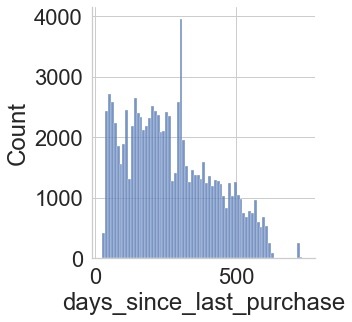

In [103]:
sns.displot(rfm_df.days_since_last_purchase)

##### По графику видно, что сначала идет "плато", затем "спад", после чего виден отдельный сегмент пользователей. Соответственно нужно более подробно посмотреть промежутки переходов, для определения границ сегментов.

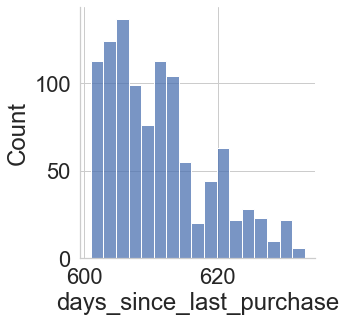

In [104]:
sns.displot(rfm_df[(rfm_df.days_since_last_purchase < 700) & (rfm_df.days_since_last_purchase > 600)].days_since_last_purchase)  # Рассмотрение периода от 600 до 700

In [105]:
rfm_df[(rfm_df.days_since_last_purchase < 700) & (rfm_df.days_since_last_purchase > 600)].days_since_last_purchase.max()  # Максимальное значание от 600 до 700


633

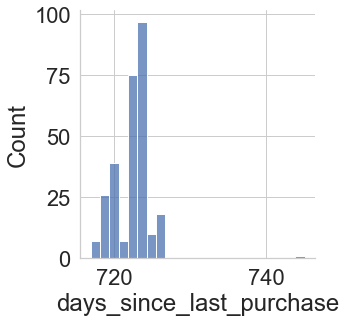

In [106]:
sns.displot(rfm_df[rfm_df.days_since_last_purchase > 633].days_since_last_purchase)  # Рассмотрение промежутка больше максимума предыдущего случая

In [107]:
rfm_df[rfm_df.days_since_last_purchase > 633].days_since_last_purchase.min()  # Мнимальное значение этого промежутка

717

##### Итого в промежутке с 634 по 717 нет значений, соответственно границу сегментов можно поставить на любое значение из промежутка. Для удобства и простоты пусть первой границей будет являться 700.

##### Теперь более подробно нужно рассмотреть вторую границу:

<AxesSubplot:xlabel='days_since_last_purchase', ylabel='Count'>

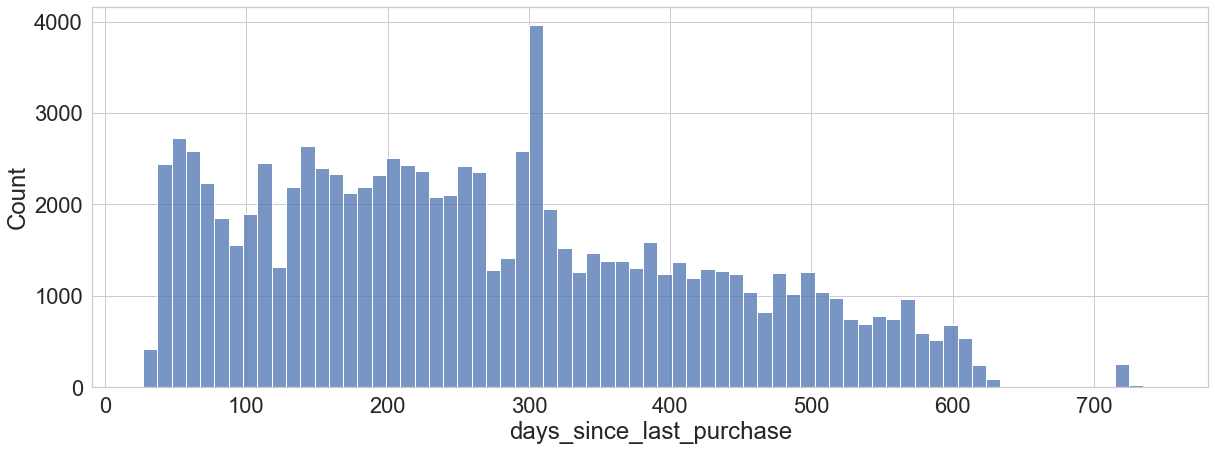

In [108]:
sns.histplot(rfm_df.days_since_last_purchase)

##### По графику видно, что вторая граница находится где-то между 290 и 340.

<AxesSubplot:xlabel='days_since_last_purchase', ylabel='Count'>

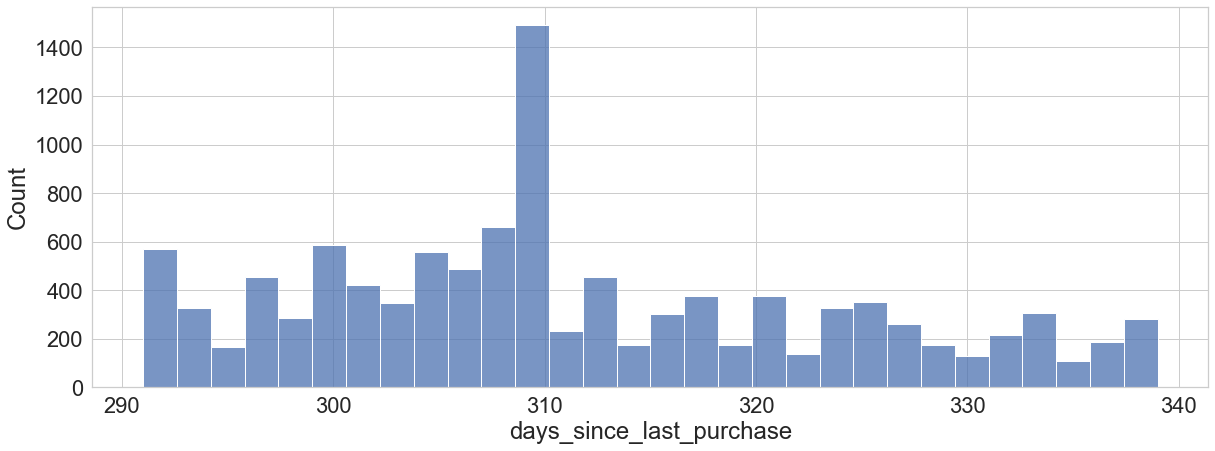

In [109]:
sns.histplot(rfm_df[(rfm_df.days_since_last_purchase > 290) & (rfm_df.days_since_last_purchase < 340)].days_since_last_purchase)

##### При более детальном рассмотрении видно, что предел нужно искать где-то около 310. Интересно, что количество пользователей, имеющих последнюю совершенную покупку приблизительно в этом периоде - максимально, а так как это количество дней до 1 октября, то по приблизительной оценке это предновогодний период (декабрь 2017). Так как порядка 97% пользователей совершили одну покупку, то можно предположить, что этот период стал неким переломным моментом, соотвтественно искать предел сегментов в этом периоде оправдано.

<AxesSubplot:xlabel='days_since_last_purchase', ylabel='Count'>

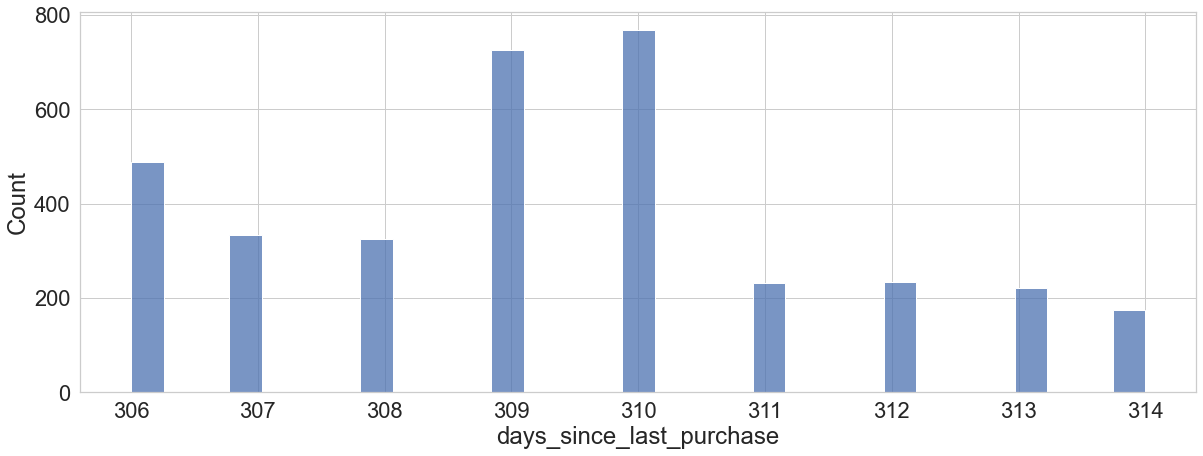

In [110]:
sns.histplot(rfm_df[(rfm_df.days_since_last_purchase > 305) & (rfm_df.days_since_last_purchase < 315)].days_since_last_purchase)

##### Количество пользователей характерно выделяется на отметке 310, соответственно логично сделать эту отметку вторым пределом.

##### В результате для **Recency** выделяется 3 сегмента:
> 1. 0-310 - 2018 год*.
> 2. 311-700 - 2017 год*.
> 3. 701 и выше - 2016 год*.
>> *- Названия сегментов - условны и выданы в соответствии с тем, к какому году принадлежит большинство дней периода.

In [111]:
def recency(days):
    if days < 311:
        return 100
    elif days < 701:
        return 200
    else:
        return 300

In [112]:
rfm_df['recency'] = rfm_df.days_since_last_purchase.apply(recency)
rfm_df

,customer_unique_id,days_since_last_purchase,orders_number,total_price,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,143,1,129.90,100
1,0000b849f77a49e4a4ce2b2a4ca5be3f,146,1,18.90,100
2,0000f46a3911fa3c0805444483337064,569,1,69.00,200
3,0000f6ccb0745a6a4b88665a16c9f078,353,1,25.99,200
4,0004aac84e0df4da2b147fca70cf8255,320,1,180.00,200
...,...,...,...,...,...
94965,fffcf5a5ff07b0908bd4e2dbc735a684,479,1,1570.00,200
94966,fffea47cd6d3cc0a88bd621562a9d061,294,1,64.89,100
94967,ffff371b4d645b6ecea244b27531430a,600,1,89.90,200
94968,ffff5962728ec6157033ef9805bacc48,151,1,115.00,100


---

### <span style='color:purple'>  **Frequency** </span>

In [113]:
rfm_df.groupby('orders_number', as_index=0).agg({'customer_unique_id': 'count'})

,orders_number,customer_unique_id
0,1,92084
1,2,2650
2,3,188
3,4,29
4,5,9
5,6,5
6,7,3
7,9,1
8,16,1


##### Таблица выше показывает количество пользователей по количеству покупок. В ней хорошо видно, на какие сегменты можно разделить пользователей: пользователи с одной покупкой, пользователи с несколькими покупками (от 2 до 4) и пользователи, имеющие больше нескольких покупок (от 5 и выше).

In [114]:
def frequency(orders):
    if orders == 1:
        return 10
    elif orders < 5:
        return 20
    else:
        return 30

In [115]:
rfm_df['frequency'] = rfm_df.orders_number.apply(frequency)
rfm_df

,customer_unique_id,days_since_last_purchase,orders_number,total_price,recency,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,143,1,129.90,100,10
1,0000b849f77a49e4a4ce2b2a4ca5be3f,146,1,18.90,100,10
2,0000f46a3911fa3c0805444483337064,569,1,69.00,200,10
3,0000f6ccb0745a6a4b88665a16c9f078,353,1,25.99,200,10
4,0004aac84e0df4da2b147fca70cf8255,320,1,180.00,200,10
...,...,...,...,...,...,...
94965,fffcf5a5ff07b0908bd4e2dbc735a684,479,1,1570.00,200,10
94966,fffea47cd6d3cc0a88bd621562a9d061,294,1,64.89,100,10
94967,ffff371b4d645b6ecea244b27531430a,600,1,89.90,200,10
94968,ffff5962728ec6157033ef9805bacc48,151,1,115.00,100,10


---

### <span style='color:purple'>  **Monetary** </span>

In [116]:
rfm_df = rfm_df.sort_values('total_price')
rfm_df

,customer_unique_id,days_since_last_purchase,orders_number,total_price,recency,frequency
80251,d80730c15c647bc8f2ad77c908ba5ca9,157,1,0.85,100,10
66692,b38211bd797f4fdd81a98b9d1754b606,159,1,0.85,100,10
18435,317cfc692e3f86c45c95697c61c853a6,36,1,2.20,100,10
70222,bd06ce0e06ad77a7f681f1a4960a3cc6,382,1,2.29,200,10
76931,cf3839da0d9492ad151690b65f45d800,240,1,2.99,100,10
...,...,...,...,...,...,...
25901,459bef486812aa25204be022145caa62,65,1,6729.00,100,10
81839,dc4802a71eae9be1dd28f5d788ceb526,595,1,6735.00,200,10
43936,763c8b1c9c68a0229c42c9fc6f662b93,75,1,7160.00,100,10
81000,da122df9eeddfedc1dc1f5349a1a690c,545,2,7388.00,200,20


In [117]:
rfm_df.total_price.describe()

count    94970.000000
mean       142.073605
std        216.085833
min          0.850000
25%         47.900000
50%         89.890000
75%        155.000000
max      13440.000000
Name: total_price, dtype: float64

In [118]:
rfm_df.total_price.nunique()

8560

##### Как видно переменная суммы имеет очень большой диапазаон значений (8556). Помимо этого прослеживается обратная зависимость от количества покупок пользователя.

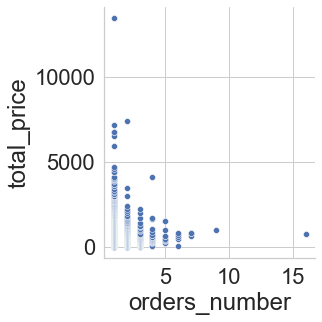

In [119]:
sns.relplot(data=rfm_df, x='orders_number', y='total_price')

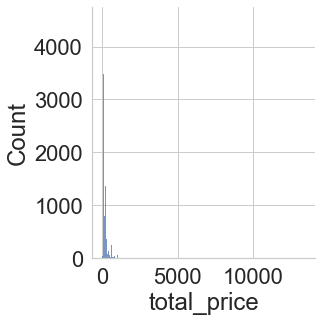

In [120]:
sns.displot(rfm_df.total_price)

##### Большинство клиентов сконцентрированы в самом начале графика. Особо крупные суммы имеют относительно небольшое количество пользователей. Лучше более внимательно посмотреть на большинство (где-то до 1000).

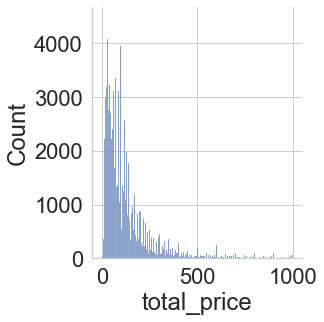

In [121]:
sns.displot(rfm_df[rfm_df.total_price < 1000].total_price)

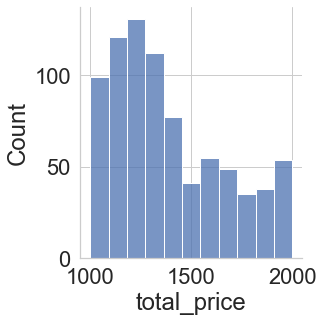

In [122]:
sns.displot(rfm_df[(rfm_df.total_price > 1000) & (rfm_df.total_price < 2000)].total_price)

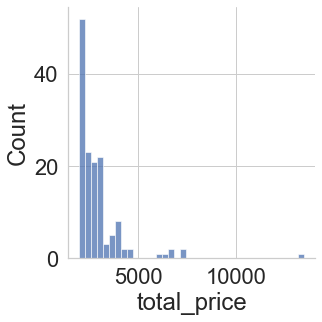

In [123]:
sns.displot(rfm_df[rfm_df.total_price > 2000].total_price)

##### Как видно на протяжении всего графика идет убывания величин, но выявить заметно отличительных групп нельзя, в таком случае простейшим решение разделить данные по квантилям.

In [124]:
monetary_border_1 = rfm_df.total_price.quantile(0.33)  # Превая граница monetary

In [125]:
monetary_border_2 = rfm_df.total_price.quantile(0.66)  # вторая граница monetary

##### Тогда:

In [128]:
def monetary(price):
    if price <= monetary_border_1:
        return 1
    elif price <= monetary_border_2:
        return 2
    else:
        return 3

In [129]:
rfm_df['monetary'] = rfm_df.total_price.apply(monetary)
rfm_df

,customer_unique_id,days_since_last_purchase,orders_number,total_price,recency,frequency,monetary
80251,d80730c15c647bc8f2ad77c908ba5ca9,157,1,0.85,100,10,1
66692,b38211bd797f4fdd81a98b9d1754b606,159,1,0.85,100,10,1
18435,317cfc692e3f86c45c95697c61c853a6,36,1,2.20,100,10,1
70222,bd06ce0e06ad77a7f681f1a4960a3cc6,382,1,2.29,200,10,1
76931,cf3839da0d9492ad151690b65f45d800,240,1,2.99,100,10,1
...,...,...,...,...,...,...,...
25901,459bef486812aa25204be022145caa62,65,1,6729.00,100,10,3
81839,dc4802a71eae9be1dd28f5d788ceb526,595,1,6735.00,200,10,3
43936,763c8b1c9c68a0229c42c9fc6f662b93,75,1,7160.00,100,10,3
81000,da122df9eeddfedc1dc1f5349a1a690c,545,2,7388.00,200,20,3


##### Напсоледок остается добавить общую RFM-переменную

In [130]:
rfm_df['RFM'] = rfm_df.recency + rfm_df.frequency + rfm_df.monetary
rfm_df

,customer_unique_id,days_since_last_purchase,orders_number,total_price,recency,frequency,monetary,RFM
80251,d80730c15c647bc8f2ad77c908ba5ca9,157,1,0.85,100,10,1,111
66692,b38211bd797f4fdd81a98b9d1754b606,159,1,0.85,100,10,1,111
18435,317cfc692e3f86c45c95697c61c853a6,36,1,2.20,100,10,1,111
70222,bd06ce0e06ad77a7f681f1a4960a3cc6,382,1,2.29,200,10,1,211
76931,cf3839da0d9492ad151690b65f45d800,240,1,2.99,100,10,1,111
...,...,...,...,...,...,...,...,...
25901,459bef486812aa25204be022145caa62,65,1,6729.00,100,10,3,113
81839,dc4802a71eae9be1dd28f5d788ceb526,595,1,6735.00,200,10,3,213
43936,763c8b1c9c68a0229c42c9fc6f662b93,75,1,7160.00,100,10,3,113
81000,da122df9eeddfedc1dc1f5349a1a690c,545,2,7388.00,200,20,3,223


##### В результате проделанной работы по RFM-сегментации пользователей получилась таблица <span style='color:red'> **rfm_df** </span>

---